In [3]:
!pip3 install keras

In [4]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
x_test = x_test.astype('float32')
x_test /= 255

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2

In [0]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

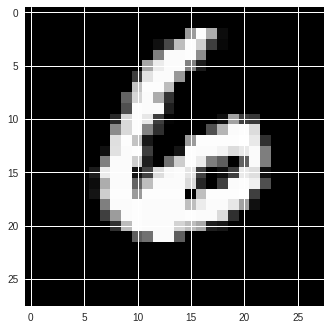

In [7]:
plt.imshow(x_train[299].reshape((28,28)),cmap = 'gray')
plt.show()

In [0]:
for i in range(len(x_train)):
  img = x_train[i];
  rnd_vert_1 = int(max(0,np.random.randn()*5))
  rnd_vert_2 = int(max(0,np.random.randn()*5))
  rnd_horiz_1 = int(max(0, np.random.randn() * 5))
  rnd_horiz_2 = int(max(0, np.random.randn() * 5))
  img = cv.copyMakeBorder(img,rnd_vert_1,rnd_vert_2,rnd_horiz_1,rnd_horiz_2, cv.BORDER_CONSTANT)

  #final resize
  img = cv.resize(img, (28, 28))

  img = np.asarray(img)
  img = img.reshape((28,28,1))
  x_train[i] = img

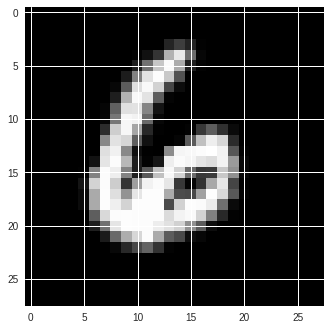

In [9]:
plt.imshow(x_train[299].reshape((28,28)),cmap = 'gray')
plt.show()

In [0]:
x_train = x_train.astype('float32')
x_train /= 255

In [11]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 198us/step - loss: 0.5553 - acc: 0.8225 - val_loss: 0.0684 - val_acc: 0.9778
Epoch 2/12
60000/60000 [==============================] - 10s 165us/step - loss: 0.2080 - acc: 0.9369 - val_loss: 0.0454 - val_acc: 0.9846
Epoch 3/12
28928/60000 [=============>................] - ETA: 4s - loss: 0.1627 - acc: 0.9514

60000/60000 [==============================] - 10s 165us/step - loss: 0.1575 - acc: 0.9527 - val_loss: 0.0339 - val_acc: 0.9884
Epoch 4/12
60000/60000 [==============================] - 10s 164us/step - loss: 0.1292 - acc: 0.9609 - val_loss: 0.0353 - val_acc: 0.9870
Epoch 5/12
60000/60000 [==============================] - 10s 165us/step - loss: 0.1115 - acc: 0.9661 - val_loss: 0.0427 - val_acc: 0.9867
Epoch 6/12
  512/60000 [..............................] - ETA: 10s - loss: 0.0729 - acc: 0.9746

60000/60000 [==============================] - 10s 164us/step - loss: 0.0992 - acc: 0.9693 - val_loss: 0.0320 - val_acc: 0.9890
Epoch 7/12
60000/60000 [==============================] - 10s 165us/step - loss: 0.0917 - acc: 0.9721 - val_loss: 0.0292 - val_acc: 0.9905
Epoch 8/12
54656/60000 [==========================>...] - ETA: 0s - loss: 0.0816 - acc: 0.9755

60000/60000 [==============================] - 10s 161us/step - loss: 0.0824 - acc: 0.9751 - val_loss: 0.0303 - val_acc: 0.9904
Epoch 9/12
60000/60000 [==============================] - 10s 163us/step - loss: 0.0775 - acc: 0.9761 - val_loss: 0.0374 - val_acc: 0.9886
Epoch 10/12
60000/60000 [==============================] - 10s 164us/step - loss: 0.0729 - acc: 0.9770 - val_loss: 0.0267 - val_acc: 0.9916
Epoch 11/12
 4736/60000 [=>............................] - ETA: 8s - loss: 0.0662 - acc: 0.9799

60000/60000 [==============================] - 10s 162us/step - loss: 0.0683 - acc: 0.9791 - val_loss: 0.0269 - val_acc: 0.9913
Epoch 12/12
60000/60000 [==============================] - 10s 164us/step - loss: 0.0656 - acc: 0.9806 - val_loss: 0.0338 - val_acc: 0.9890
Test loss: 0.03379664756749971
Test accuracy: 0.989


In [0]:
model.save("model_mnist.h5")

In [15]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

KeyboardInterrupt: ignored

In [0]:
from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

In [38]:
from googleapiclient.http import MediaFileUpload

file_metadata = {
  'name': 'Sample file',
  'mimeType': 'text/plain'
}
media = MediaFileUpload('model_mnist.h5', 
                        mimetype='text/plain',
                        resumable=True)
created = drive_service.files().create(body=file_metadata,
                                       media_body=media,
                                       fields='id').execute()
print('File ID: {}'.format(created.get('id')))

File ID: 1q1Ssr2WAvmew04VsMx0R_xyFtTmkVc5U


In [0]:
from google.colab import files

In [0]:
files.download("model_mnist.h5")

In [0]:
!zip model.zip model_mnist.h5
!zip -s 10M model.zip --out split.zip